<a href="https://colab.research.google.com/github/guillaumetougas/sbl_hyperspectral_ai/blob/main/02_scripts/sbl_hs_plsda_modif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PLSDA with 3 main species at SBL

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




ABBA ACRU BEPA 
 861 1864 1992 


ABBA ACRU BEPA 
1722 1864 1992 

[1] 1301

Joining with `by = join_by(BD_Band376nm, BD_Band381nm, BD_Band386nm,
BD_Band391nm, BD_Band396nm, BD_Band400nm, BD_Band405nm, BD_Band410nm,
BD_Band415nm, BD_Band420nm, BD_Band424nm, BD_Band429nm, BD_Band434nm,
BD_Band439nm, BD_Band443nm, BD_Band448nm, BD_Band453nm, BD_Band458nm,
BD_Band463nm, BD_Band467nm, BD_Band472nm, BD_Band477nm, BD_Band482nm,
BD_Band486nm, BD_Band491nm, BD_Band496nm, BD_Band501nm, BD_Band506nm,
BD_Band510nm, BD_Band515nm, BD_Band520nm, BD_Band525nm, BD_Band530nm,
BD_Band534nm, BD_Band539nm, BD_Band544nm, BD_Band549nm, BD_Band553nm,
BD_Band558nm, BD_Band563nm, BD_Band568nm, BD_Band573nm, BD_Band577nm,
BD_Band582nm, BD_Band587nm, BD_Band592nm, BD_Band597nm, BD_Band601nm,
BD_Band606nm, BD_Band611nm, BD_Band616nm, BD_Band620nm, BD_Band625nm,
BD_Band630nm, BD_Band635nm, BD_Band640nm, BD_Band644nm, BD_Band649nm,
BD_Band654nm, BD_Band659nm, BD_Band664nm, BD_Band668nm, BD_Band673nm,
BD_Band678nm, BD_Band683nm, BD_Band687nm, BD_Band692nm, BD_Band697nm,
BD_Band702nm, BD_Band


PLS-DA model (class plsda) summary
------------------------------------
Info: 
Number of selected components: 19
Cross-validation: full (leave one out)

Class #1 (ABBA)
    X cumexpvar Y cumexpvar   TP  FP   TN  FN Spec. Sens. Accuracy
Cal       99.99       53.66 1003 146 2544 211 0.946 0.826    0.909
Cv           NA          NA  998 155 2535 216 0.942 0.822    0.905

Class #2 (ACRU)
    X cumexpvar Y cumexpvar  TP  FP   TN  FN Spec. Sens. Accuracy
Cal       99.99       53.66 980 165 2438 321 0.937 0.753    0.876
Cv           NA          NA 972 175 2428 329 0.933 0.747    0.871

Class #3 (BEPA)
    X cumexpvar Y cumexpvar   TP  FP   TN  FN Spec. Sens. Accuracy
Cal       99.99       53.66 1081 180 2335 308 0.928 0.778    0.875
Cv           NA          NA 1071 188 2327 318 0.925 0.771    0.870


PLS-DA model (class plsda) summary
------------------------------------
Info: 
Number of selected components: 5
Cross-validation: full (leave one out)

Class #1 (ABBA)
    X cumexpvar Y cumexpva

,ABBA,ACRU,BEPA,None
ABBA,1003,71,60,130
ACRU,73,980,120,180
BEPA,73,94,1081,179


,ABBA,None
ABBA,881,333
None,207,2483


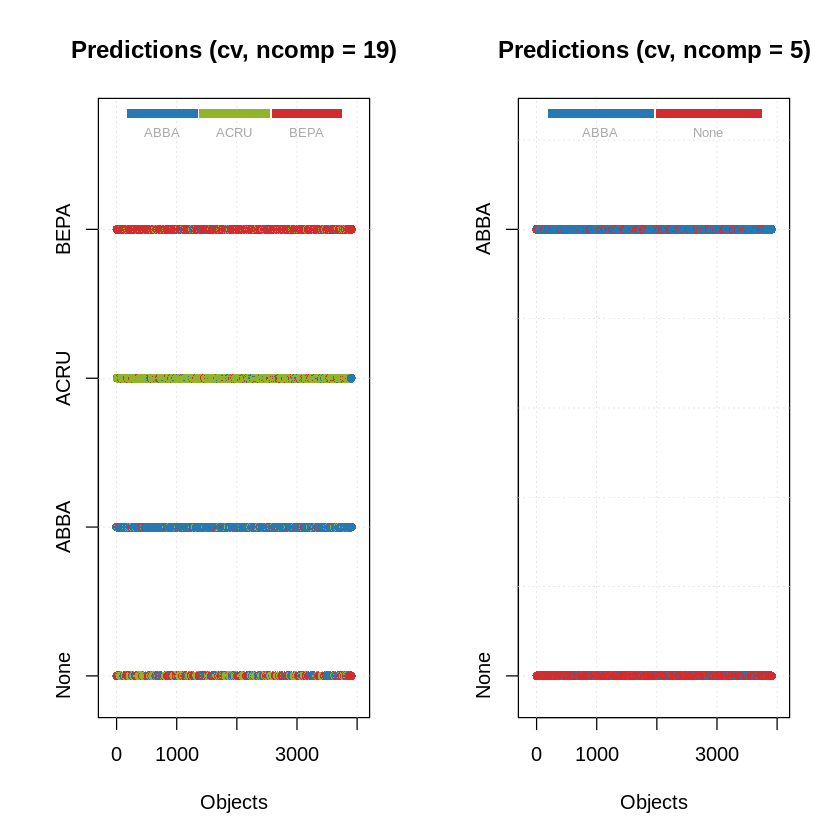

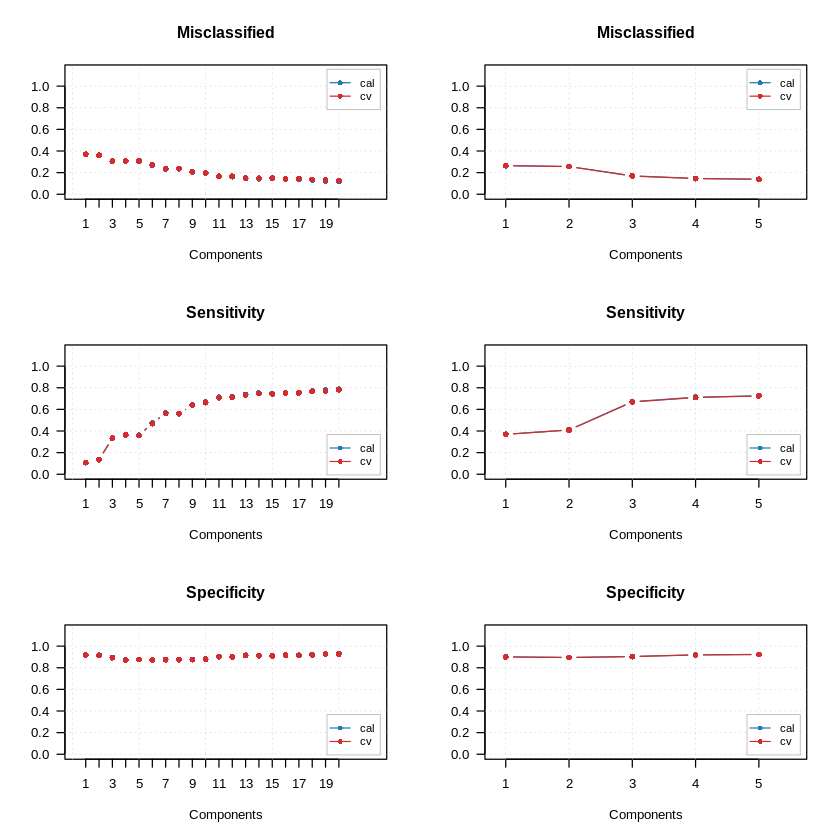


PLS-DA results (class plsdares) summary:
Number of selected components: 19

Class #1 (ABBA):
        X expvar X cumexpvar Y expvar Y cumexpvar   TP FP TN   FN Spec. Sens.
Comp 1    95.092      95.092   25.688      25.688  602  0  0 1072    NA 0.360
Comp 2     3.591      98.683    1.046      26.735  650  0  0 1024    NA 0.388
Comp 3     0.855      99.538   -1.745      24.990  664  0  0 1010    NA 0.397
Comp 4     0.189      99.728   20.363      45.353 1142  0  0  532    NA 0.682
Comp 5     0.088      99.816    4.030      49.383 1200  0  0  474    NA 0.717
Comp 6     0.046      99.861   -1.299      48.084 1195  0  0  479    NA 0.714
Comp 7     0.044      99.905    0.483      48.566 1229  0  0  445    NA 0.734
Comp 8     0.034      99.939    1.973      50.539 1250  0  0  424    NA 0.747
Comp 9     0.020      99.959   -0.906      49.633 1250  0  0  424    NA 0.747
Comp 10    0.016      99.976    3.568      53.201 1286  0  0  388    NA 0.768
Comp 11    0.005      99.981   -1.263      51.93

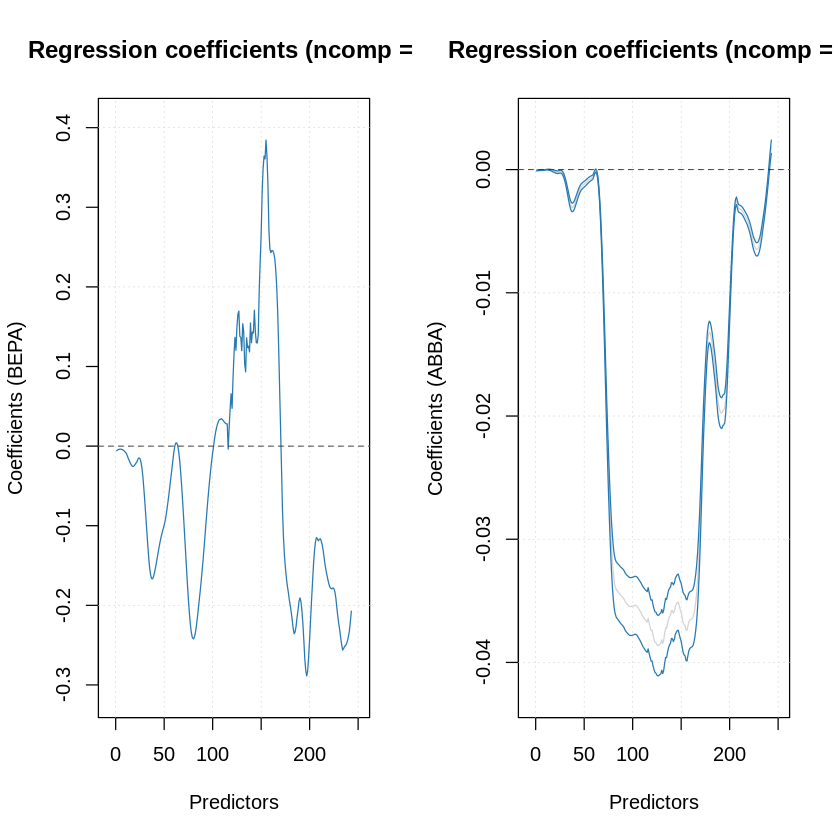

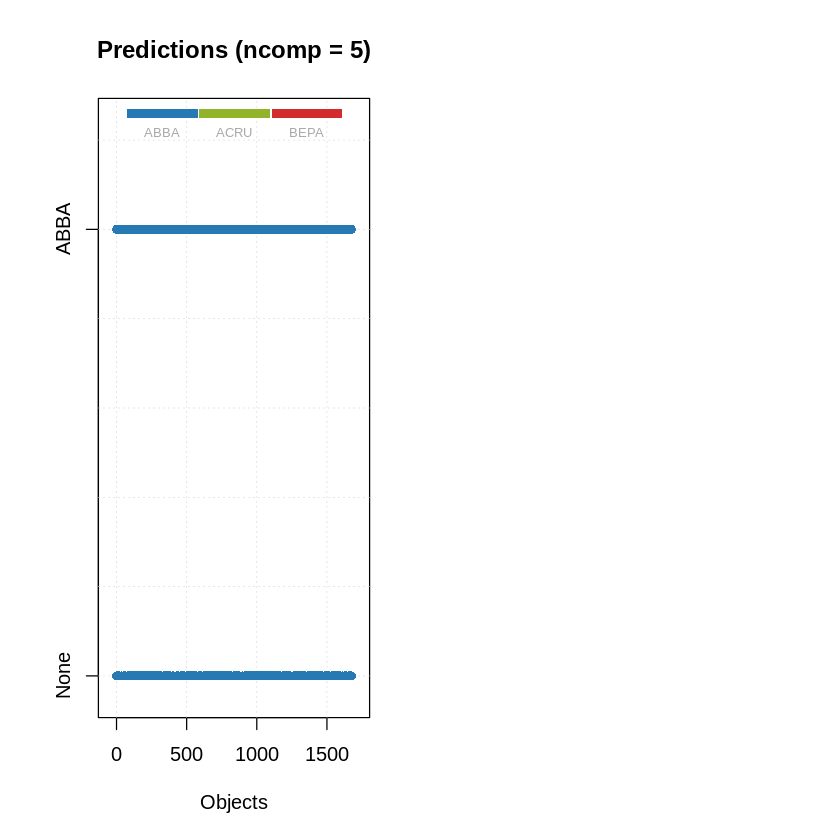

In [ ]:
install.packages('mdatools')
install.packages('tidyverse')
install.packages('smotefamily')

library(mdatools)
library(tidyverse)
library(smotefamily)

set.seed(133) #For reproducibility
#import
sbl_sp_ID_bd <- read_rds("sbl_smoothed_spectra.rds")


####SUBSET WITH ABBA,BEPA and ACRU####
sbl_sp_ID_bd_sub <- subset(sbl_sp_ID_bd, Label==c("ABBA","BEPA","ACRU"))

sbl_sp_ID_bd_sub$Label <- as.factor (sbl_sp_ID_bd_sub$Label)
sbl_sp_ID_bd_sub$Label <- droplevels(sbl_sp_ID_bd_sub$Label)#Drop unused factor levels from filtered out species

sbl_sp_ID_bd_sub[, 245] <- factor(sbl_sp_ID_bd_sub[, 245])
table(sbl_sp_ID_bd_sub[, 245])

# Apply SMOTE
smote_sbl_sub_total <- SMOTE(X = sbl_sp_ID_bd_sub[,2:244], target = sbl_sp_ID_bd_sub$Label, K = 5, dup_size = 1)

# Combine the SMOTE result into a new data frame
smote_sbl_sub <- data.frame(smote_sbl_sub_total$data)
names(smote_sbl_sub)[ncol(smote_sbl_sub)] <- "Species"
smote_sbl_sub$Species <- as.factor(smote_sbl_sub$Species)

# Check the distribution of the target variable after SMOTE
table(smote_sbl_sub$Species)

cal_ind_sub <- smote_sbl_sub[sample(1:nrow(smote_sbl_sub),0.70*nrow(smote_sbl_sub), replace=F),]
length(which(cal_ind_sub$Species=="ACRU"))

val_ind_sub <- anti_join(smote_sbl_sub,cal_ind_sub)

Xc_sub = smote_sbl_sub[rownames(cal_ind_sub), 1:243]
Xv_sub = smote_sbl_sub[rownames(val_ind_sub), 1:243]

cc_all_sub = smote_sbl_sub[rownames(cal_ind_sub), 244]
cv_all_sub = smote_sbl_sub[rownames(val_ind_sub), 244]

cc_abba_sub = cc_all_sub == "ABBA"
cv_abba_sub = cv_all_sub == "ABBA"

m_all_sub = plsda(Xc_sub, cc_all_sub, 20, cv = 1)
m_abba_sub = plsda(Xc_sub, cc_abba_sub, 5, cv = 1, classname = "ABBA")

summary(m_all_sub)
summary(m_abba_sub)

getConfusionMatrix(m_all_sub$calres)
getConfusionMatrix(m_abba_sub$calres)

#Classification plots
par(mfrow = c(1, 2))
plotPredictions(m_all_sub) #choose which class to show predictions for with nc= n
plotPredictions(m_abba_sub) #choose which class to show predictions for with nc= n

#Performance plots
par(mfrow = c(3, 2))
plotMisclassified(m_all_sub, nc = 3)
plotMisclassified(m_abba_sub)
plotSensitivity(m_all_sub, nc = 3)
plotSensitivity(m_abba_sub)
plotSpecificity(m_all_sub, nc = 3)
plotSpecificity(m_abba_sub)

par(mfrow = c(1, 2))
plotRegcoeffs(m_all_sub, ncomp = 3, ny = 3)
plotRegcoeffs(m_abba_sub, ncomp = 1, show.ci = TRUE)

#Predictions for new data (validation subset)

res_sub <- predict(m_all_sub,Xv_sub,cv_all_sub, type="prob")
summary(res_sub)

resabba_sub <-  predict(m_abba_sub, Xv_sub, cv_all_sub, )
summary(resabba_sub)

plotPredictions(resabba_sub)

# PLSDA with all species in SBL

In [3]:
install.packages("mdatools")
install.packages("tidyverse")
install.packages("smotefamily")

library(mdatools)
library(tidyverse)
library(smotefamily)

set.seed(133) #For reproducibility
#import
sbl_sp_ID_bd <- read_rds("sbl_smoothed_spectra.rds")

sbl_sp_ID_bd$Label <- as.factor(sbl_sp_ID_bd$Label)

#Global model

sbl_sp_ID_bd <- sbl_sp_ID_bd[,-248]%>%
  dplyr::group_by(Label) %>%  # Group by 'Label'
  dplyr::filter(n() > 300) %>% # Keep groups with more than 300 occurrences
  dplyr::filter(!Label %in% c("Acer","Picea")) %>%
  dplyr::ungroup() %>%
  dplyr::filter(!is.na(Label))

sbl_sp_ID_bd$Label <- droplevels(sbl_sp_ID_bd$Label)#Drop unused factor levels from filtered out species
sbl_sp_ID_bd$Label <- as.factor(sbl_sp_ID_bd$Label)
levels(sbl_sp_ID_bd$Label)

table(sbl_sp_ID_bd[, 245])

# Apply SMOTE (maybe not for large class numbers)
#smote_sbl_total <- SMOTE(X = sbl_sp_ID_bd[,2:244], target = sbl_sp_ID_bd$Label,
#                      K = 5, dup_size = 3)

# Combine the SMOTE result into a new data frame
smote_sbl <- sbl_sp_ID_bd[,2:244]

#smote_sbl <- data.frame(smote_sbl_total$data)
names(smote_sbl)[ncol(smote_sbl)] <- "Species"
smote_sbl$Species <- as.factor(smote_sbl$Species)

smote_sbl$Species <- droplevels(smote_sbl$Species)#Drop unused factor levels from filtered out species


# Check the distribution of the target variable after SMOTE
table(smote_sbl$Species)

cal.ind <- smote_sbl[sample(1:nrow(smote_sbl),0.80*nrow(smote_sbl), replace=F),]
length(which(cal.ind$Species=="ACRU"))

val.ind <- anti_join(smote_sbl,cal.ind)

table(val.ind$Species)

Xc <-  smote_sbl[rownames(cal.ind), 1:242]
Xv <-  smote_sbl[rownames(val.ind), 1:242]

cc.all <-  cal.ind[rownames(cal.ind), 243]
cc.all <- as.factor (cc.all$Species)
cv.all <-  val.ind[rownames(val.ind), 243]
cv.all <- as.factor(cv.all$Species)
table(cc.all)
table(cv.all)

cc.abba <- cc.all == "ABBA"
cc.abba <- as.factor(cc.abba)
cc.abba <- droplevels(cc.abba)
cv.abba <- cv.all == "ABBA"
cv.abba <- as.factor(cv.abba)


m.all <-  mdatools::plsda(Xc, cc.all, ncomp = 9, cv = 1)
m.abba <- mdatools::plsda(Xc, cc.abba, ncomp=2, cv = 1, classname = "ABBA")

summary(m.all)
summary(m.abba)

getConfusionMatrix(m.all$calres)
getConfusionMatrix(m.abba$calres)

#Classification plots
par(mfrow = c(1, 2))
plotPredictions(m.all) #choose which class to show predictions for with nc= n
plotPredictions(m.abba) #choose which class to show predictions for with nc= n

#Performance plots
par(mfrow = c(3, 2))
plotMisclassified(m.all, nc = 3)
plotMisclassified(m.abba)
plotSensitivity(m.all, nc = 3)
plotSensitivity(m.abba)
plotSpecificity(m.all, nc = 3)
plotSpecificity(m.abba)

par(mfrow = c(1, 2))
plotRegcoeffs(m.all, ncomp = 3, ny = 3)
plotRegcoeffs(m.abba, ncomp = 1, show.ci = TRUE)

#Predictions for new data (validation subset)

res <- predict(m.all,Xv,cv.all)
summary(res)

plotPredictions(res)

resabba <-  predict(m.abba, Xv, cv.all)
summary(resabba)

plotPredictions(resabba)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in readRDS(con, refhook = refhook):
“cannot open file '04_outputs/sbl_smoothed_spectra.rds': No such file or directory”


ERROR: Error in readRDS(con, refhook = refhook): cannot open the connection
